In [73]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import label_binarize
from scipy.signal import savgol_filter
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


In [75]:
df = r"C:\Users\maria\OneDrive\Desktop\Prokoders\Maria's\Machine Learning\Logistic Regression\breast_cancer.csv"

In [77]:
df = pd.read_csv(df)

In [79]:
print(df.head())  

print(df.info())  


   Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
0                5                        1                         1   
1                5                        4                         4   
2                3                        1                         1   
3                6                        8                         8   
4                4                        1                         1   

   Marginal Adhesion  Single Epithelial Cell Size  Bare Nuclei  \
0                  1                            2            1   
1                  5                            7           10   
2                  1                            2            2   
3                  1                            3            4   
4                  3                            2            1   

   Bland Chromatin  Normal Nucleoli  Mitoses  Class  
0                3                1        1      2  
1                3                2        1      2  
2 

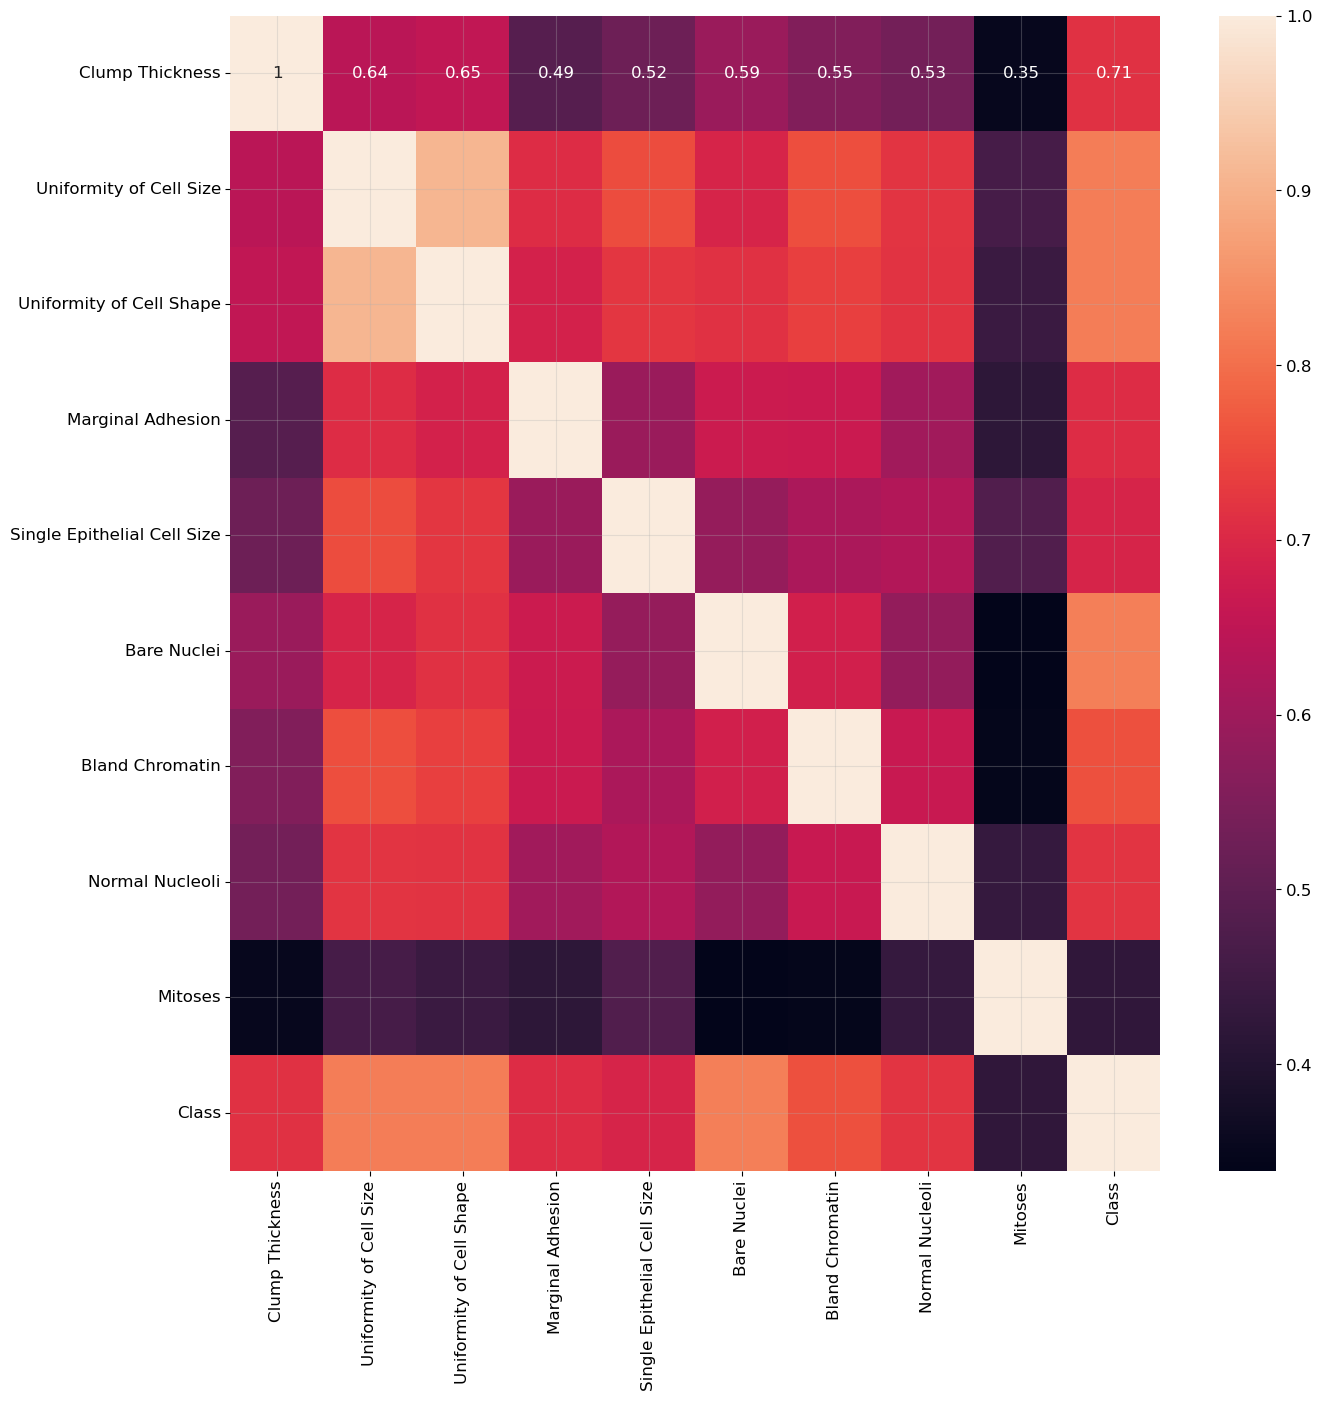

In [81]:
corr = df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True)
plt.show()

In [83]:
df.corr()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Clump Thickness,1.000000,0.642481,0.653470,0.487829,0.523596,0.593091,0.553742,0.534066,0.350957,0.714790
Uniformity of Cell Size,0.642481,1.000000,0.907228,0.706977,0.753544,0.691709,0.755559,0.719346,0.460755,0.820801
Uniformity of Cell Shape,0.653470,0.907228,1.000000,0.685948,0.722462,0.713878,0.735344,0.717963,0.441258,0.821891
Marginal Adhesion,0.487829,0.706977,0.685948,1.000000,0.594548,0.670648,0.668567,0.603121,0.418898,0.706294
Single Epithelial Cell Size,0.523596,0.753544,0.722462,0.594548,1.000000,0.585716,0.618128,0.628926,0.480583,0.690958
Bare Nuclei,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210,0.822696
Bland Chromatin,0.553742,0.755559,0.735344,0.668567,0.618128,0.680615,1.000000,0.665602,0.346011,0.758228
Normal Nucleoli,0.534066,0.719346,0.717963,0.603121,0.628926,0.584280,0.665602,1.000000,0.433757,0.718677
Mitoses,0.350957,0.460755,0.441258,0.418898,0.480583,0.339210,0.346011,0.433757,1.000000,0.423448
Class,0.714790,0.820801,0.821891,0.706294,0.690958,0.822696,0.758228,0.718677,0.423448,1.000000


In [85]:
X = df.drop('Class', axis=1)
y = df['Class']

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [47]:


param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Create GridSearchCV object
grid_search = GridSearchCV(
    estimator=LogisticRegression(max_iter=200),  
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  
    n_jobs=-1,  
    verbose=2   
)

# Fit the model
grid_search.fit(X, y)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

cv_results = pd.DataFrame(grid_search.cv_results_)
print("\nDetailed results:")
print(cv_results[['params', 'mean_test_score', 'std_test_score']])

# Get the best model
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
print(y_pred)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation score: 0.9663696865607557

Detailed results:
                                               params  mean_test_score  \
0   {'C': 0.001, 'penalty': 'l1', 'solver': 'libli...         0.650075   
1     {'C': 0.001, 'penalty': 'l1', 'solver': 'saga'}         0.650075   
2   {'C': 0.001, 'penalty': 'l2', 'solver': 'libli...         0.858137   
3     {'C': 0.001, 'penalty': 'l2', 'solver': 'saga'}         0.953231   
4   {'C': 0.01, 'penalty': 'l1', 'solver': 'liblin...         0.935670   
5      {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}         0.951750   
6   {'C': 0.01, 'penalty': 'l2', 'solver': 'liblin...         0.916660   
7      {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}         0.960541   
8   {'C': 0.1, 'penalty': 'l1', 'solver': 'libline...         0.957621   
9       {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}         0.

In [39]:

kf = KFold(n_splits=5, shuffle=True, random_state=42)


for fold, (train_idx, val_idx) in enumerate(kf.split(X), 1):


    X_train_fold = X.iloc[train_idx]

    X_val_fold = X.iloc[val_idx]

    y_train_fold = y.iloc[train_idx]

    y_val_fold = y.iloc[val_idx]

    

    # Train model using best parameters

    model = LogisticRegression(**grid_search.best_params_)

    model.fit(X_train_fold, y_train_fold)

    


    y_pred_fold = model.predict(X_val_fold)

    

    print(f"\nFold {fold} Results:")

    print(classification_report(y_val_fold, y_pred_fold))


Fold 1 Results:
              precision    recall  f1-score   support

           2       0.94      0.99      0.96        79
           4       0.98      0.91      0.95        58

    accuracy                           0.96       137
   macro avg       0.96      0.95      0.95       137
weighted avg       0.96      0.96      0.96       137


Fold 2 Results:
              precision    recall  f1-score   support

           2       0.97      0.99      0.98        95
           4       0.97      0.93      0.95        42

    accuracy                           0.97       137
   macro avg       0.97      0.96      0.97       137
weighted avg       0.97      0.97      0.97       137


Fold 3 Results:
              precision    recall  f1-score   support

           2       0.98      0.96      0.97        91
           4       0.92      0.96      0.94        46

    accuracy                           0.96       137
   macro avg       0.95      0.96      0.95       137
weighted avg       0.96

Overall Accuracy: 0.9635


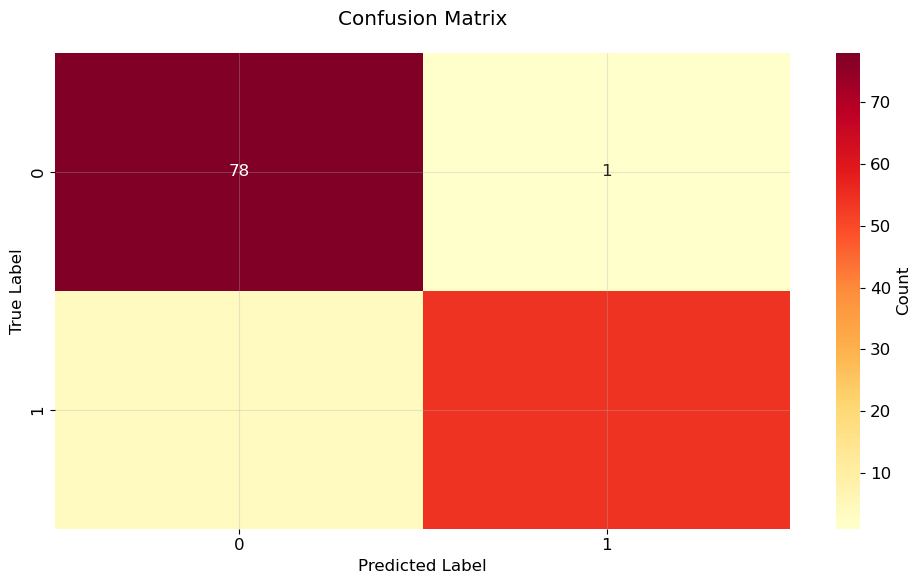

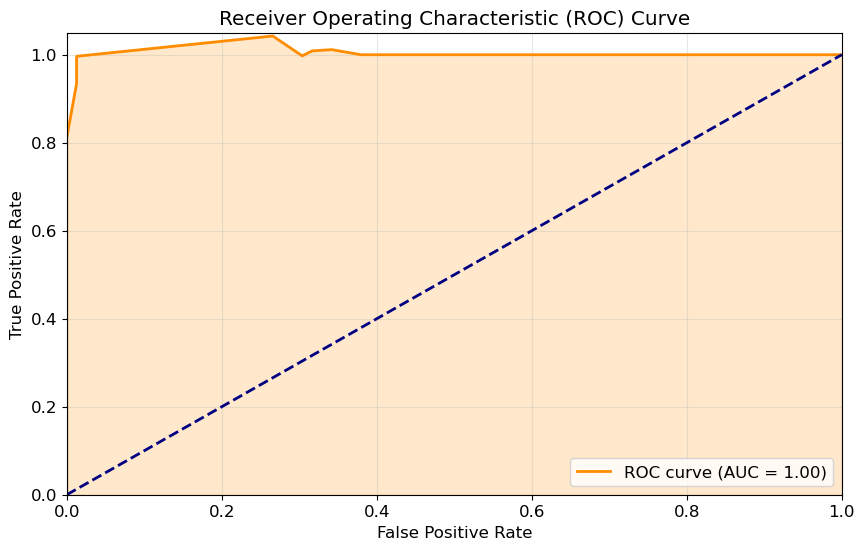

C:\Users\maria\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


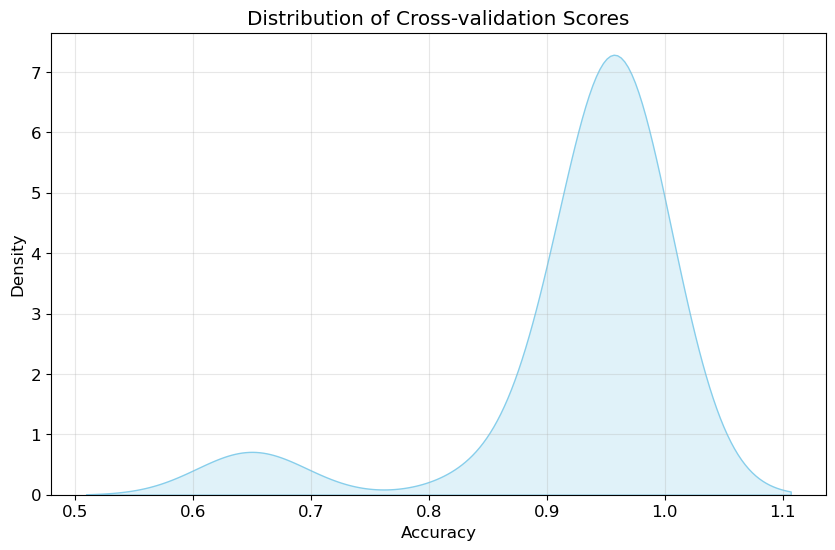

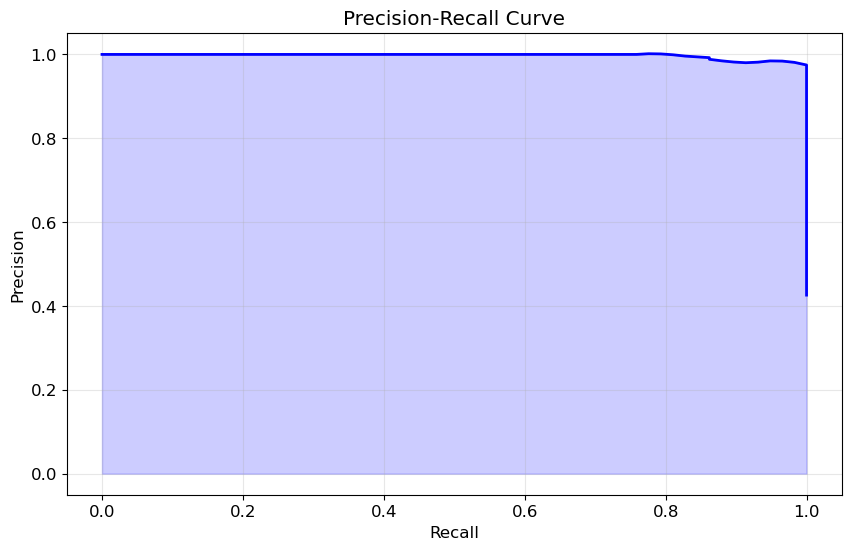

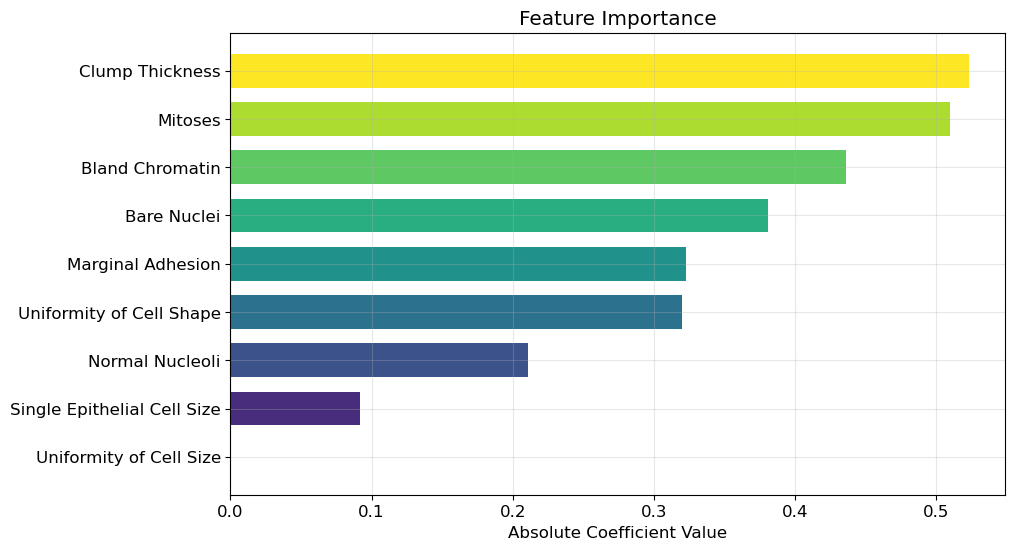

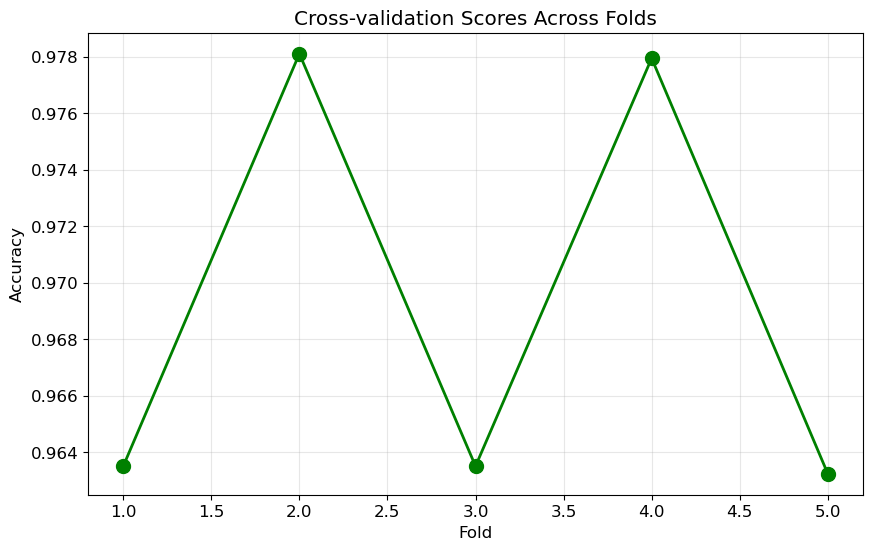

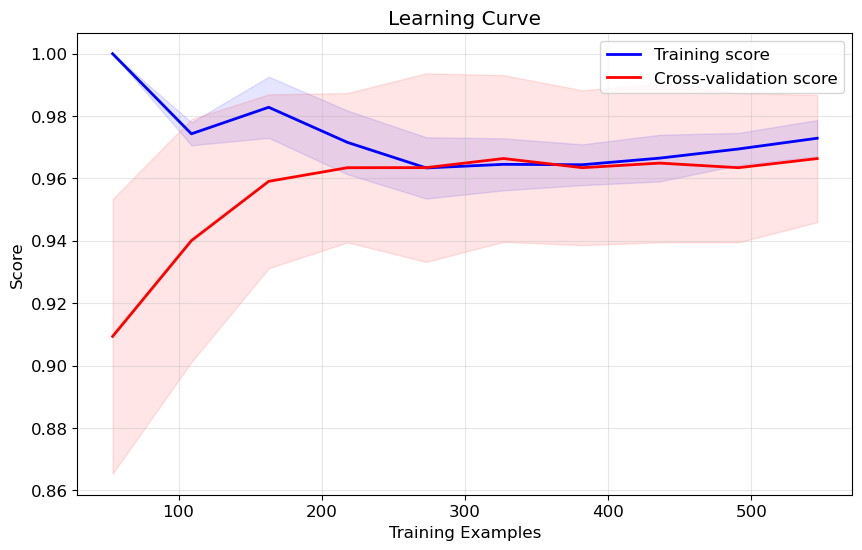


Summary Statistics:
Overall Accuracy: 0.9635
Mean CV Score: 0.9274
Standard Deviation of CV Scores: 0.0866
Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


In [71]:


plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

#  Calculate overall accuracy
overall_accuracy = accuracy_score(y_test, y_pred)
print(f"Overall Accuracy: {overall_accuracy:.4f}")

#  Confusion Matrix Heatmap
plt.figure()
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrRd', cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix', pad=20)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

#  ROC Curve with smoothing
plt.figure()
y_test_binary = (y_test == 4).astype(int)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test_binary, y_pred_proba)

# Apply Savitzky-Golay filter for smoothing
if len(fpr) > 10:  # Only apply smoothing if we have enough points
    tpr_smooth = savgol_filter(tpr, min(len(fpr)-1 if len(fpr) % 2 == 0 else len(fpr), 11), 3)
else:
    tpr_smooth = tpr

plt.plot(fpr, tpr_smooth, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc(fpr, tpr):.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.fill_between(fpr, tpr_smooth, alpha=0.2, color='darkorange')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# C. Cross-validation scores distribution
plt.figure()
cv_scores = cv_results['mean_test_score']
sns.kdeplot(data=cv_scores, fill=True, color='skyblue')
plt.title('Distribution of Cross-validation Scores')
plt.xlabel('Accuracy')
plt.ylabel('Density')
plt.show()



# E. Precision-Recall Curve with smoothing
plt.figure()
precision, recall, _ = precision_recall_curve(y_test_binary, y_pred_proba)

# Apply Savitzky-Golay filter for smoothing
if len(recall) > 10:  # Only apply smoothing if we have enough points
    precision_smooth = savgol_filter(precision, min(len(recall)-1 if len(recall) % 2 == 0 else len(recall), 11), 3)
else:
    precision_smooth = precision

plt.plot(recall, precision_smooth, color='blue', lw=2)
plt.fill_between(recall, precision_smooth, alpha=0.2, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# F. Feature Importance Plot
if hasattr(X, 'columns'):
    plt.figure()
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': abs(best_model.coef_[0])
    })
    feature_importance = feature_importance.sort_values('importance', ascending=True)
    
    # Create gradient colors
    colors = plt.cm.viridis(np.linspace(0, 1, len(feature_importance)))
    
    plt.barh(feature_importance['feature'], feature_importance['importance'],
             color=colors, height=0.7)
    plt.title('Feature Importance')
    plt.xlabel('Absolute Coefficient Value')
    plt.show()

#  Cross-validation scores across folds
plt.figure()
fold_scores = []
for fold, (train_idx, val_idx) in enumerate(kf.split(X), 1):
    X_val_fold = X.iloc[val_idx]
    y_val_fold = y.iloc[val_idx]
    y_pred_fold = model.predict(X_val_fold)
    fold_scores.append(accuracy_score(y_val_fold, y_pred_fold))

plt.plot(range(1, 6), fold_scores, 'go-', linewidth=2, markersize=10)
plt.title('Cross-validation Scores Across Folds')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.show()

# H. Learning Curve
plt.figure()
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X, y, cv=5, n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10))

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training score', color='blue', linewidth=2)
plt.plot(train_sizes, test_mean, label='Cross-validation score', color='red', linewidth=2)
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='red')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.show()

# Print summary statistics
print("\nSummary Statistics:")
print(f"Overall Accuracy: {overall_accuracy:.4f}")
print(f"Mean CV Score: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation of CV Scores: {np.std(cv_scores):.4f}")
print(f"Best Parameters: {grid_search.best_params_}")